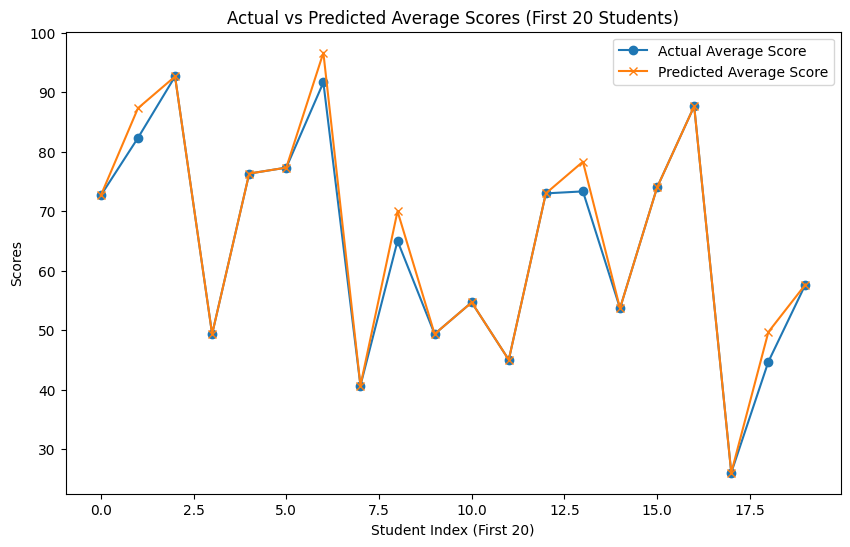

In [4]:
#To ensure inline plotting:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Cleaned_Students_Performance.csv')

# Ensure 'test_preparation_course' is properly formatted
data['test_preparation_course'] = data['test_preparation_course'].astype(str).str.strip().str.lower()

# Replace numeric values in 'test_preparation_course' with 'none' and 'completed'
data['test_preparation_course'] = data['test_preparation_course'].replace({'0': 'none', '1': 'completed'})

# Define the function to adjust scores
def predict_average_score(row):
    if row['test_preparation_course'] == 'completed':
        return row['average_score'] + 5  # Add 5 points for completing the course
    else:
        return row['average_score']      # Keep the score unchanged otherwise

# Apply the function to calculate predicted scores
data['predicted_score'] = data.apply(predict_average_score, axis=1)

# Plot Actual vs Predicted Average Scores for the First 20 Students
plt.figure(figsize=(10, 6))
plt.plot(data['average_score'][:20], label='Actual Average Score', marker='o')
plt.plot(data['predicted_score'][:20], label='Predicted Average Score', marker='x')
plt.xlabel('Student Index (First 20)')
plt.ylabel('Scores')
plt.title('Actual vs Predicted Average Scores (First 20 Students)')
plt.legend()
plt.show()




Average score with test prep: 72.66945996275605
Average score without test prep: 65.03894080996885


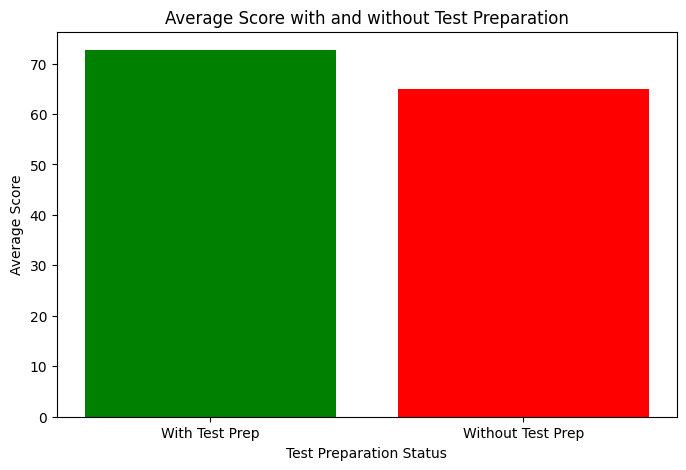

In [5]:
# 2. Checking if Test Preparation Helps
# Calculate average scores for students with and without test preparation
prep_completed = data[data['test_preparation_course'] == 'completed']
prep_none = data[data['test_preparation_course'] == 'none']

avg_score_prep = prep_completed['average_score'].mean()
avg_score_no_prep = prep_none['average_score'].mean()

# Print the average scores for clarity
print("Average score with test prep:", avg_score_prep)
print("Average score without test prep:", avg_score_no_prep)

# Plot a bar chart comparing the two groups
plt.figure(figsize=(8, 5))
plt.bar(['With Test Prep', 'Without Test Prep'], [avg_score_prep, avg_score_no_prep], color=['green', 'red'])
plt.xlabel('Test Preparation Status')
plt.ylabel('Average Score')
plt.title('Average Score with and without Test Preparation')
plt.show()


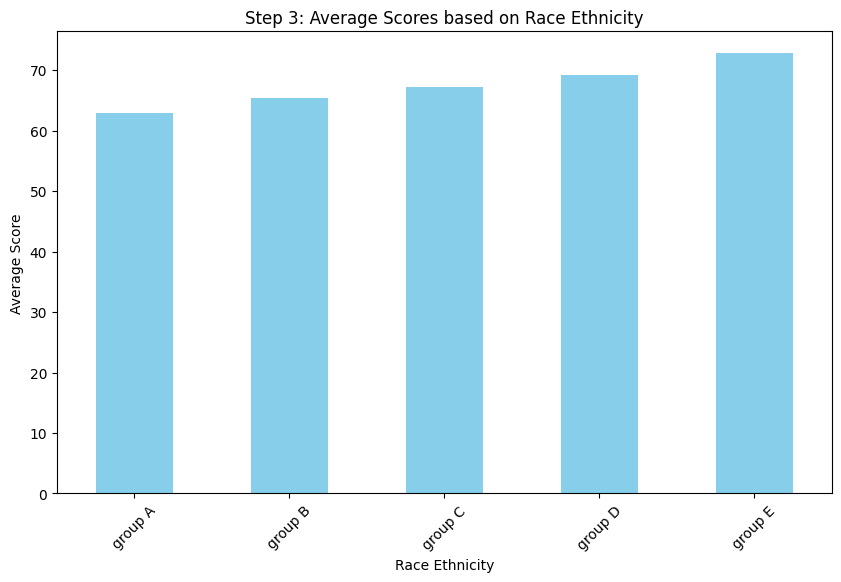

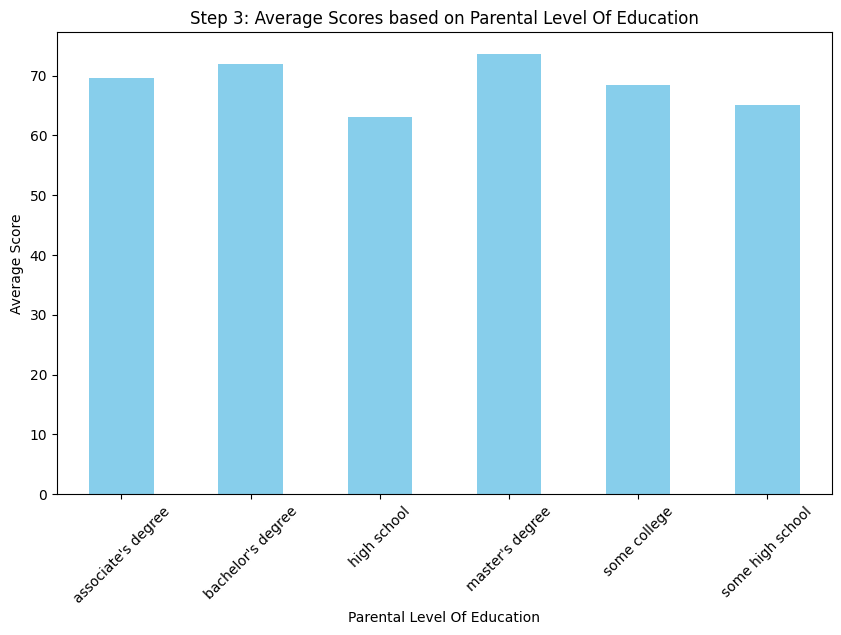

In [6]:
# 3. Analyzing Social and Family Factors
def analyze_social_factors(data):
    factors = ['race_ethnicity', 'parental_level_of_education']
    for factor in factors:
        avg_scores = data.groupby(factor)['average_score'].mean()
        plt.figure(figsize=(10, 6))
        avg_scores.plot(kind='bar', color='skyblue')
        plt.xlabel(factor.replace('_', ' ').title())
        plt.ylabel('Average Score')
        plt.title(f'Step 3: Average Scores based on {factor.replace("_", " ").title()}')
        plt.xticks(rotation=45)
        plt.show()

analyze_social_factors(data)